In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem

In [2]:
# import for drawing
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
import rdkit
print(rdkit.__version__)

2020.03.3


In [3]:
# reading in all csv
dft_confirmed = pd.read_csv('dft_confirmed.csv') #radical passing both the critetia
outliers_ie = pd.read_csv('outliers_ie.csv') #outlier in IE
outliers_ea = pd.read_csv('outliers_ea.csv') #outlier in EA
outliers_stability = pd.read_csv('outliers_stability.csv') #outlier in stability
hh =  pd.read_csv('training_high_ie_high_ea.csv') #reference high-high
lh =  pd.read_csv('training_low_ie_high_ea.csv') #reference low-high
hl =  pd.read_csv('training_high_ie_low_ea.csv') #reference high-low
ll =  pd.read_csv('training_low_ie_low_ea.csv') #reference low-low

### checking and drawing dft_confirmed

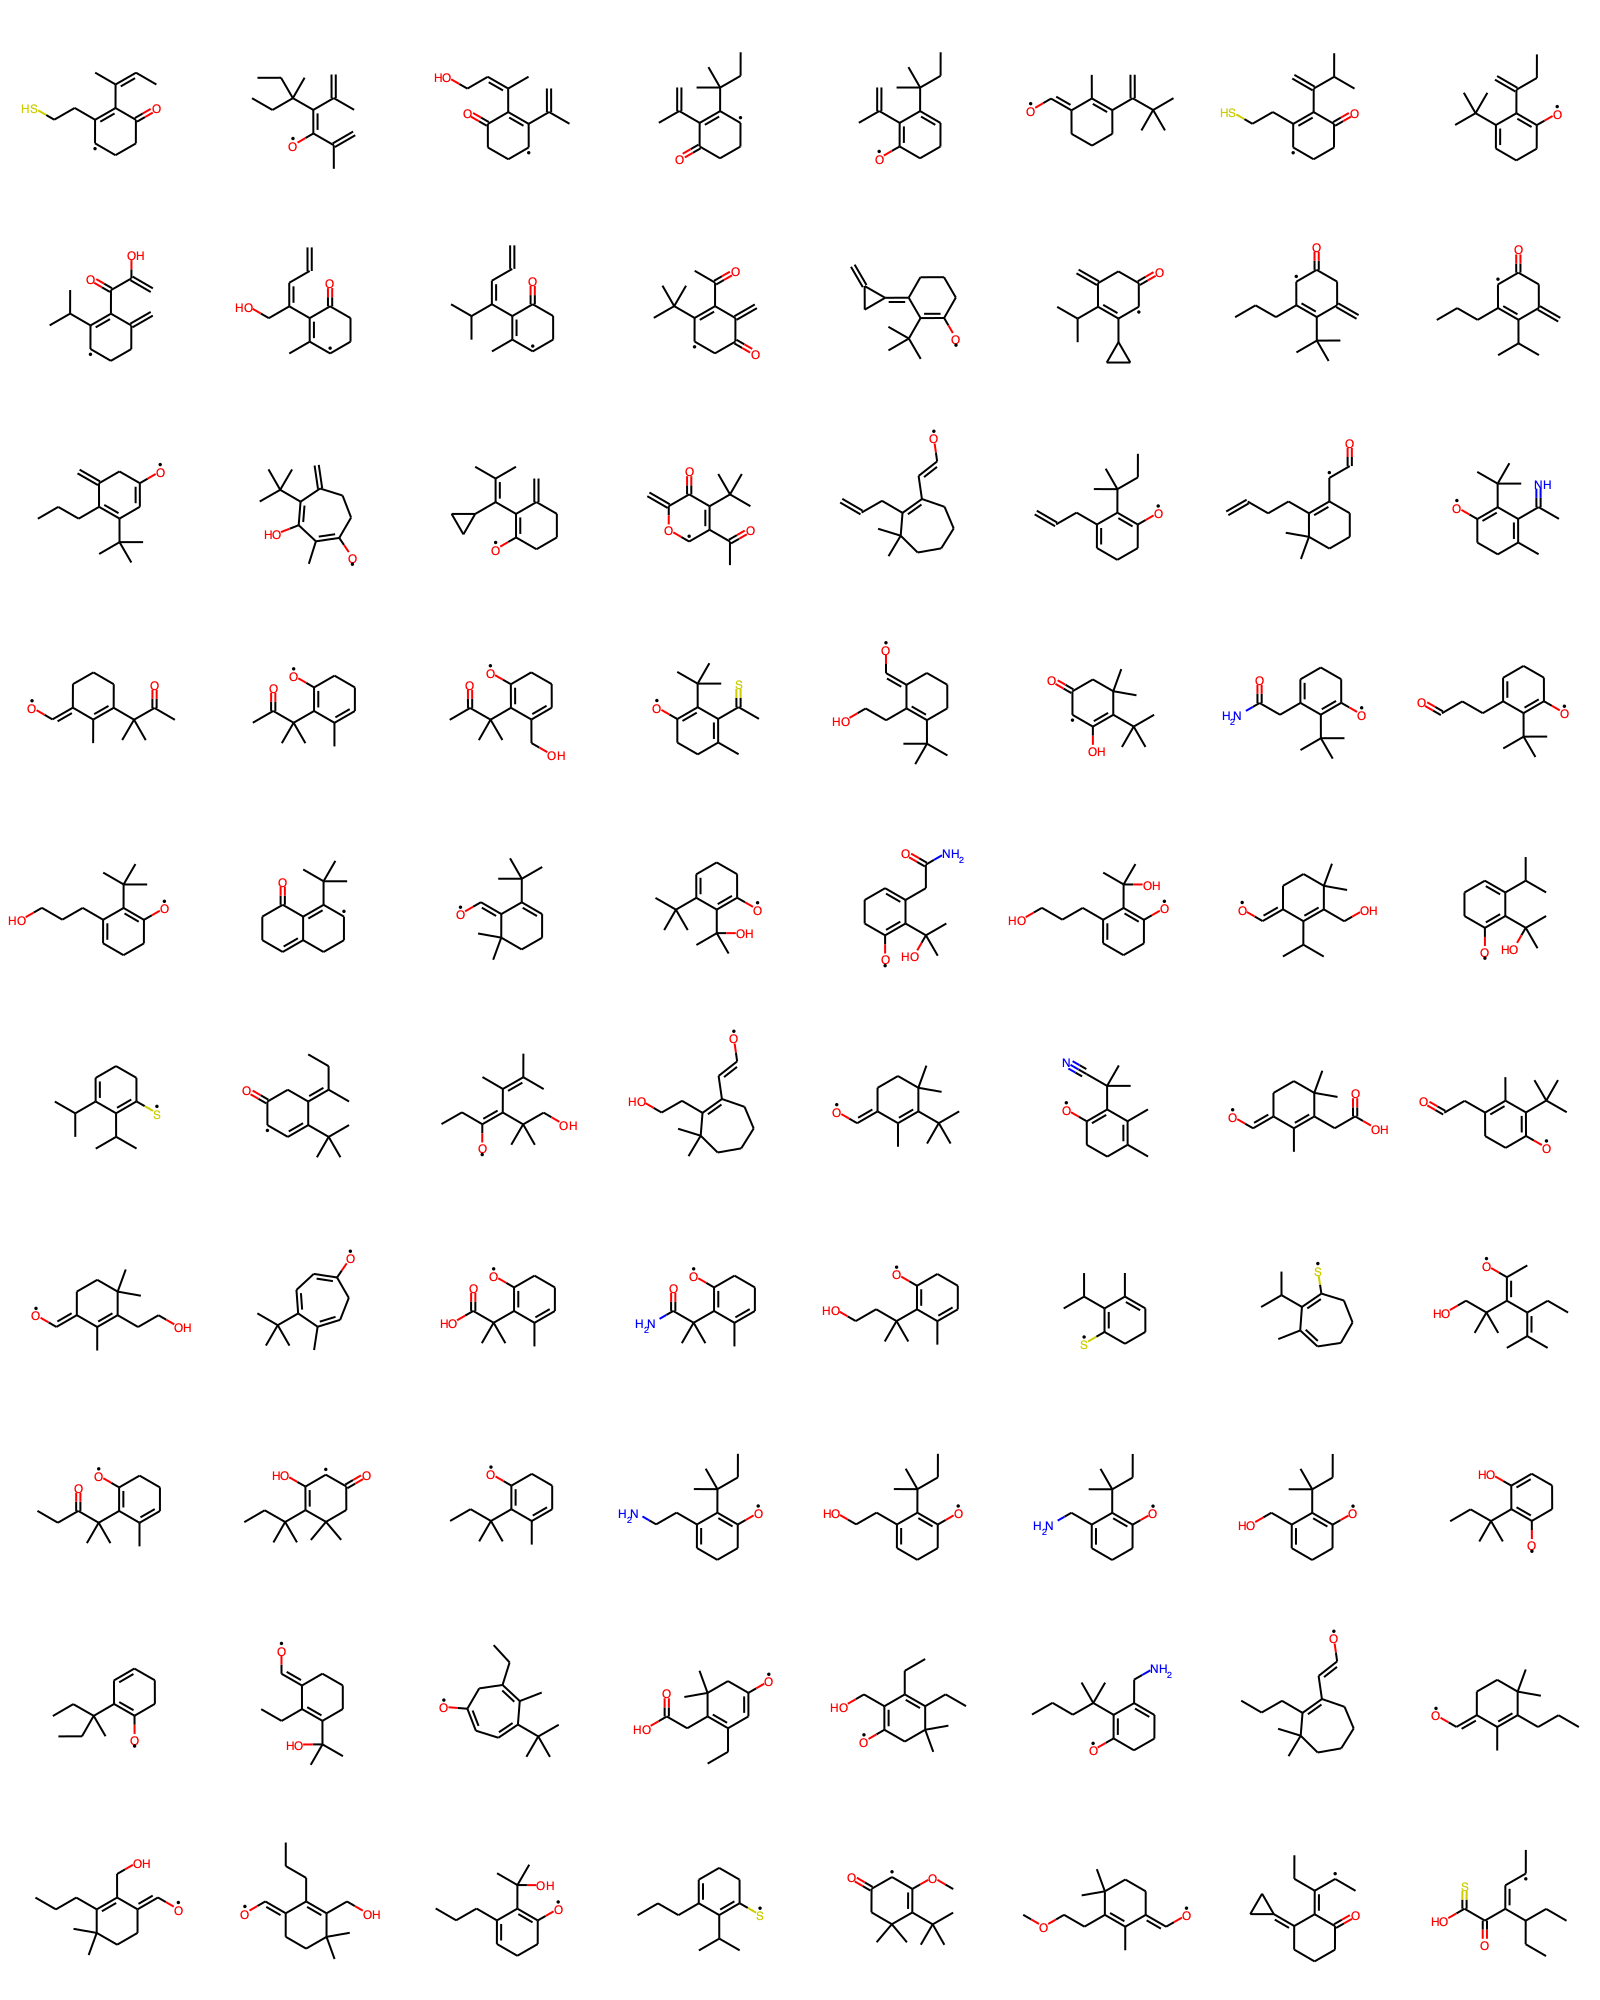

In [4]:
mols_dft = [Chem.MolFromSmiles(smi) for smi in dft_confirmed.smiles.unique()]
Chem.Draw.MolsToGridImage(mols_dft,molsPerRow=8,maxMols=100)

### checking and drawing outliers IE

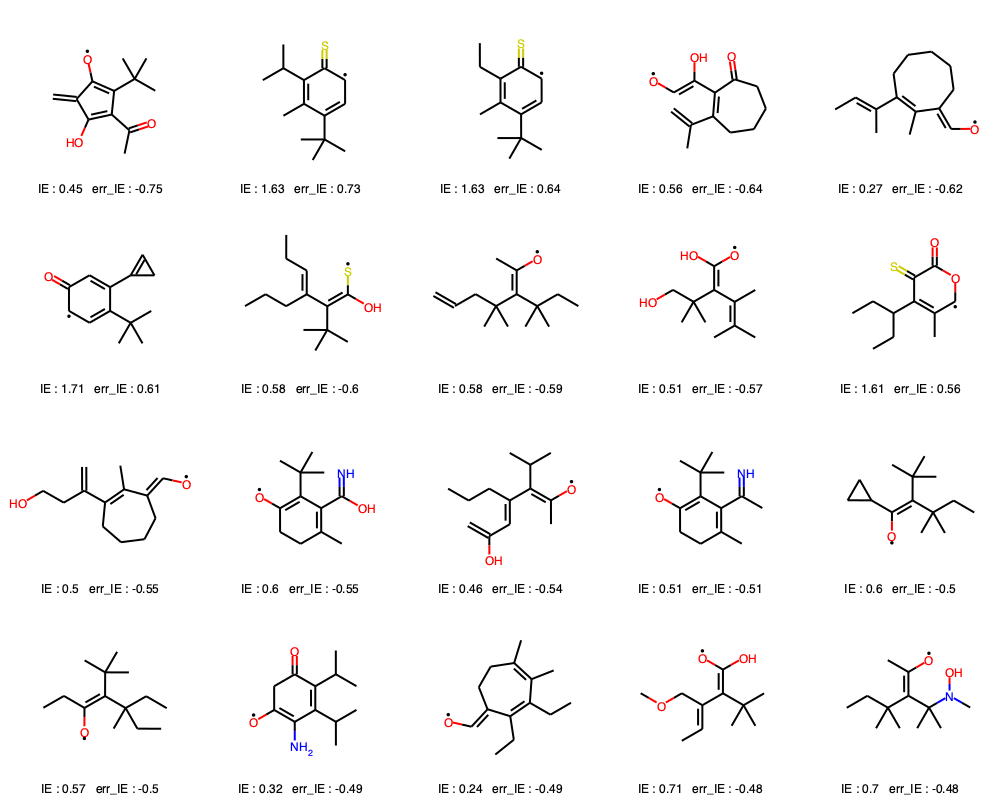

In [5]:
outliers_ie = outliers_ie.rename(columns={'err ionization energy':'err_ie','ionization energy':'ie'})
mols_ie = [Chem.MolFromSmiles(smi) for smi in outliers_ie.smiles.unique()]
text_ie =[]
for x,y in zip(outliers_ie.ie,outliers_ie.err_ie):
    textstr = r'IE : {0}'.format(round(x,2))+'\n'
    textstr += r'  err_IE : {0}'.format(round(y,2))
    text_ie.append(textstr)
Chem.Draw.MolsToGridImage(mols_ie,molsPerRow=5,maxMols=100,legends=text_ie)
#showing the error in ie

1. Most cases it optimises to tertiary carbocation with the +1 charge when an electron is removed. The carbocation is not on the same teriary C as that of the radical
2. I checked a few files and then noticed that all the structures had the same fragment 

### checking and drawing outliers EA

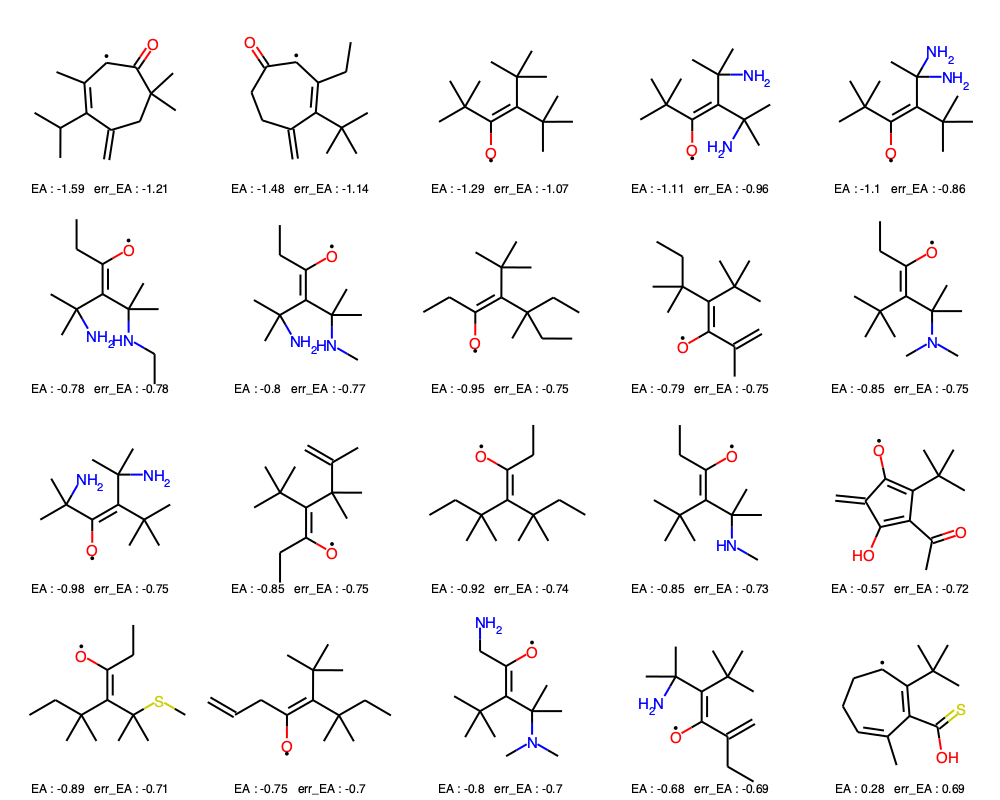

In [6]:
outliers_ea = outliers_ea.rename(columns={'err electron affinity':'err_ea','electron affinity':'ea'})
mols_ea = [Chem.MolFromSmiles(smi) for smi in outliers_ea.smiles.unique()]
text_ea =[]
for x,y in zip(outliers_ea.ea,outliers_ea.err_ea):
    textstr = r'EA : {0}'.format(round(x,2))+'\n'
    textstr += r'  err_EA : {0}'.format(round(y,2))
    text_ea.append(textstr)
Chem.Draw.MolsToGridImage(mols_ea,molsPerRow=5,maxMols=100,legends=text_ea)
#showing the error in ie

1. Most cases it optimises to 'O' with the -1 charge when an electron in added. However in the radical for the spin density is highest on the tertiary 'C'.
2. A similar change is also there with Sulphur
3. I checked a few files and then noticed that all the structures had the same fragment 